In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.utils import resample
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, MaxPool1D, Convolution1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import random

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datafiles/combined_train.csv", header=None)
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datafiles/combined_test.csv", header=None)

In [ ]:
train

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98461,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
98462,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
98463,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
98464,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


In [ ]:
train.shape

(98466, 188)

In [ ]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,98466.000000,98466.000000,98466.000000,98466.000000,98466.000000,98466.000000,98466.000000,98466.000000,98466.000000,98466.000000,...,98466.000000,98466.000000,98466.000000,98466.000000,98466.000000,98466.000000,98466.000000,98466.000000,98466.000000,98466.000000
mean,0.899942,0.753996,0.421397,0.221492,0.201677,0.210970,0.207439,0.204157,0.201767,0.200301,...,0.004603,0.004244,0.003911,0.003579,0.003339,0.003135,0.002888,0.002643,0.002496,1.005829
std,0.229069,0.219353,0.229911,0.211889,0.181821,0.174129,0.178658,0.177228,0.172482,0.169543,...,0.042320,0.040389,0.038675,0.036748,0.035362,0.034427,0.032909,0.031107,0.030116,1.859856
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.929648,0.665712,0.245322,0.048818,0.080357,0.088608,0.075758,0.069307,0.067885,0.071006,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.992318,0.818942,0.423077,0.166023,0.146635,0.158845,0.147541,0.148148,0.153459,0.151961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.908979,0.577001,0.340984,0.259259,0.285388,0.296970,0.295880,0.292551,0.286344,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


# The classes
There are five classes in the dataset:

0 - Non-ecotic beats (normal beat)
1 - Supraventricular ectopic beats
2 - Ventricular ectopic beats
3 - Fusion beats
4 - Unknown beats

Count in each label: 
0    50000
1    50000
2    50000
3    50000
4    50000
5    50000
6    50000
Name: 187, dtype: int64


<BarContainer object of 7 artists>

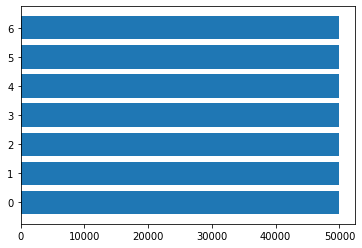

In [ ]:
label_names = ['Non-ecotic beats (normal beat)', 'Supraventricular ectopic beats', 'Ventricular ectopic beats', 'Fusion beats', 'Unknown beats', 'Abnormal', 'Normal']

labels = train[187].astype('int64') 

print("Count in each label: ")
print(labels.value_counts())

plt.barh(list(set(labels)), list(labels.value_counts()))

In [ ]:
train.shape

(350000, 188)

In [ ]:
train_lbl0 = resample(train[train[187]==0], replace=True, n_samples=50000, random_state=113)
train_lbl1 = resample(train[train[187]==1], replace=True, n_samples=50000, random_state=113)
train_lbl2 = resample(train[train[187]==2], replace=True, n_samples=50000, random_state=113)
train_lbl3 = resample(train[train[187]==3], replace=True, n_samples=50000, random_state=113)
train_lbl4 = resample(train[train[187]==4], replace=True, n_samples=50000, random_state=113)
train_lbl5 = resample(train[train[187]==5], replace=True, n_samples=50000, random_state=113)
train_lbl6 = resample(train[train[187]==6], replace=True, n_samples=50000, random_state=113)

In [ ]:
train= pd.concat([train_lbl0, train_lbl1, train_lbl2, train_lbl3, train_lbl4, train_lbl5, train_lbl6])

labels = train[187].astype('int64')   # last column has the labels

print("Count in each label: ")
print(labels.value_counts())


Count in each label: 
0    50000
1    50000
2    50000
3    50000
4    50000
5    50000
6    50000
Name: 187, dtype: int64


Text(0.5, 1.0, 'Non-ecotic beats (normal beat)')

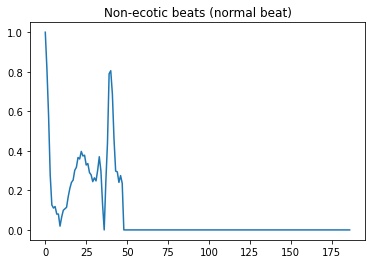

In [ ]:
plt.plot(np.array(train_lbl0.sample(1))[0, :187])
plt.title(label_names[0])

Text(0.5, 1.0, 'Supraventricular ectopic beats')

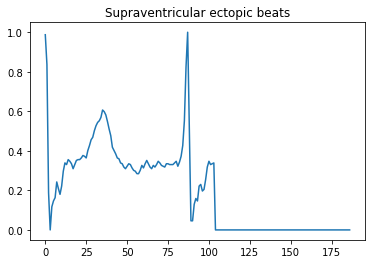

In [ ]:
plt.plot(np.array(train_lbl1.sample(1))[0, :187])
plt.title(label_names[1])

Text(0.5, 1.0, 'Ventricular ectopic beats')

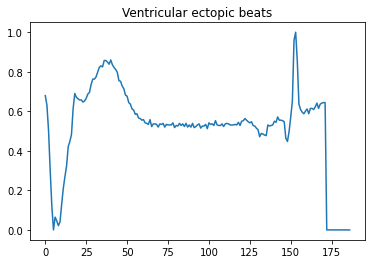

In [ ]:
plt.plot(np.array(train_lbl2.sample(1))[0, :187])
plt.title(label_names[2])

Text(0.5, 1.0, 'Fusion beats')

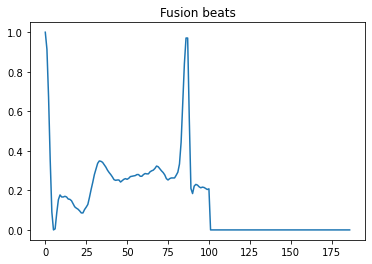

In [ ]:
plt.plot(np.array(train_lbl3.sample(1))[0, :187])
plt.title(label_names[3])

Text(0.5, 1.0, 'Unknown beats')

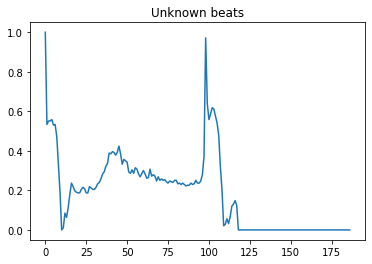

In [ ]:
plt.plot(np.array(train_lbl4.sample(1))[0, :187])
plt.title(label_names[4])

Text(0.5, 1.0, 'Abnormal')

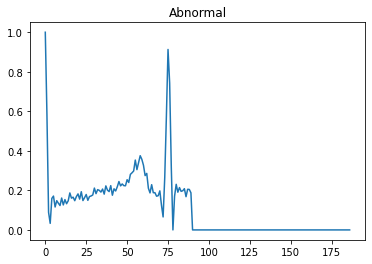

In [ ]:
plt.plot(np.array(train_lbl5.sample(1))[0, :187])
plt.title(label_names[5])

Text(0.5, 1.0, 'Normal')

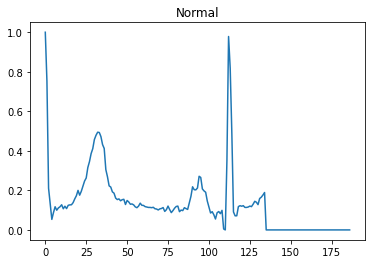

In [ ]:
plt.plot(np.array(train_lbl6.sample(1))[0, :187])
plt.title(label_names[6])

In [ ]:
def gaussian_noise(signal):
    noise = np.random.normal(0,0.05,187)
    return signal + noise

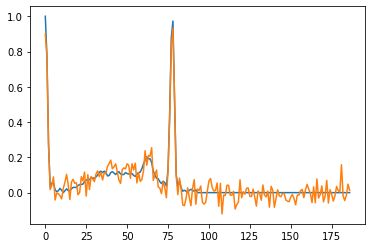

In [ ]:
sample = train_lbl0.sample(1).values[0]

sample_with_noise = gaussian_noise(sample[:187])

plt.subplot(1, 1, 1)

plt.plot(sample[:187])
plt.plot(sample_with_noise)

In [ ]:

ytrain = tensorflow.keras.utils.to_categorical(train[187])
ytest = tensorflow.keras.utils.to_categorical(test[187])

# Input to the model
xtrain = train.values[:, :187]
xtest = test.values[:, :187]

# Adding noise
for i in range(xtrain.shape[0]):
    xtrain[i, :187] = gaussian_noise(xtrain[i, :187])

In [ ]:
xtrain.shape

(350000, 187)

In [ ]:
xtrain

array([[ 0.85160152,  0.57691223,  0.3523796 , ...,  0.03371886,
         0.02855964, -0.00483927],
       [ 0.97835325,  0.6567132 , -0.03157095, ...,  0.01881493,
        -0.07425254,  0.03207408],
       [ 0.85261748,  0.9373101 ,  0.55495741, ...,  0.01254397,
         0.090261  ,  0.03689373],
       ...,
       [ 0.9261652 ,  0.70026811,  0.17352651, ...,  0.01309596,
         0.08357248,  0.02702255],
       [ 1.08275606,  0.48405087,  0.06905028, ..., -0.00200863,
         0.04577911,  0.02931654],
       [ 0.96215794,  0.41258587, -0.01270369, ..., -0.00636225,
         0.01964793, -0.03398397]])

In [ ]:
# np.expand_dims() : we can get the expanded dimensions of the array

In [ ]:
xtrain = np.expand_dims(xtrain, 2)
xtest = np.expand_dims(xtest, 2)

print("Shape of training data: ")
print("Input: ", xtrain.shape)
print("Output: ", ytrain.shape)

print("\nShape of test data: ")
print("Input: ", xtest.shape)
print("Output: ", ytest.shape)

Shape of training data: 
Input:  (350000, 187, 1)
Output:  (350000, 7)

Shape of test data: 
Input:  (25531, 187, 1)
Output:  (25531, 7)


In [ ]:
model = Sequential()
model.add(Conv1D(64, 6, activation = 'relu', input_shape = xtrain[0].shape))
model.add(MaxPool1D(3, 2))

model.add(Conv1D(64, 6, activation = 'relu'))
model.add(MaxPool1D(3, 2))

model.add(Conv1D(64, 6, activation = 'relu'))
model.add(MaxPool1D(3, 2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(7, activation = 'softmax'))

model.compile(optimizer = tensorflow.keras.optimizers.Adam(0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 182, 64)           448       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 90, 64)           0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 85, 64)            24640     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 42, 64)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 37, 64)            24640     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 18, 64)          

In [ ]:
history = model.fit(xtrain, ytrain, epochs = 8, batch_size = 32, validation_data = (xtest, ytest))


Epoch 1/8
10938/10938 [==============================] - 350s 32ms/step - loss: 0.0420 - accuracy: 0.9857 - val_loss: 0.1771 - val_accuracy: 0.9580
Epoch 2/8
10938/10938 [==============================] - 344s 31ms/step - loss: 0.0390 - accuracy: 0.9866 - val_loss: 0.1876 - val_accuracy: 0.9610
Epoch 3/8
10938/10938 [==============================] - 344s 31ms/step - loss: 0.0370 - accuracy: 0.9877 - val_loss: 0.1867 - val_accuracy: 0.9617
Epoch 4/8
10938/10938 [==============================] - 349s 32ms/step - loss: 0.0351 - accuracy: 0.9882 - val_loss: 0.1950 - val_accuracy: 0.9572
Epoch 5/8
10938/10938 [==============================] - 353s 32ms/step - loss: 0.0331 - accuracy: 0.9888 - val_loss: 0.1902 - val_accuracy: 0.9637
Epoch 6/8
10938/10938 [==============================] - 365s 33ms/step - loss: 0.0323 - accuracy: 0.9892 - val_loss: 0.1953 - val_accuracy: 0.9604
Epoch 7/8
10938/10938 [==============================] - 395s 36ms/step - loss: 0.0308 - accuracy: 0.9898 - val_

In [ ]:
def plot(history, variable, variable2):
    plt.plot(range(len(history[variable])), history[variable])
    plt.plot(range(len(history[variable2])), history[variable2])
    plt.legend([variable, variable2])
    plt.title(variable)

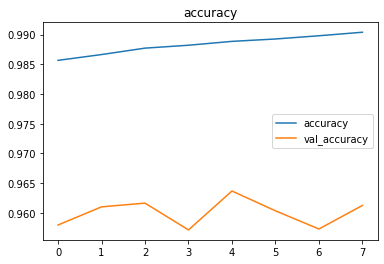

In [ ]:
plot(history.history, "accuracy", "val_accuracy")

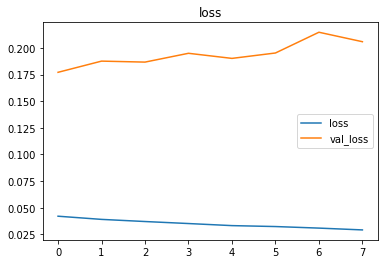

In [ ]:
plot(history.history, "loss", "val_loss")

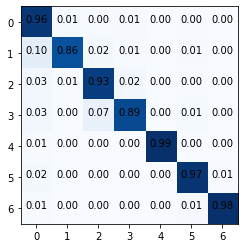

In [ ]:
ypred = model.predict(xtest)

cm = confusion_matrix(ytest.argmax(axis=1), ypred.argmax(axis=1))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

for i in range(cm.shape[1]):
    for j in range(cm.shape[0]):
        plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="black")


plt.imshow(cm, cmap=plt.cm.Blues)

In [ ]:
print("The distribution of test set labels")
print(test[187].value_counts())

print('F1_score = ', f1_score(ytest.argmax(axis=1), ypred.argmax(axis=1), average = 'macro'))

The distribution of test set labels
0.0    18118
5.0     2627
4.0     1608
2.0     1448
6.0     1012
1.0      556
3.0      162
Name: 187, dtype: int64
F1_score =  0.8699156517929174


In [ ]:
import csv
f = open('path/to/csv_file', 'w')
writer = csv.writer(f)
writer.writerow(row)
f.close()

Streaming output truncated to the last 5000 lines.
Model prediction :  Non-ecotic beats (normal beat)  with probability  1.0
Actual label:  Non-ecotic beats (normal beat)
Model prediction :  Non-ecotic beats (normal beat)  with probability  1.0
Actual label:  Non-ecotic beats (normal beat)
Model prediction :  Non-ecotic beats (normal beat)  with probability  0.9999999
Actual label:  Non-ecotic beats (normal beat)
Model prediction :  Non-ecotic beats (normal beat)  with probability  0.9665571
Actual label:  Non-ecotic beats (normal beat)
Model prediction :  Non-ecotic beats (normal beat)  with probability  0.99999833
Actual label:  Non-ecotic beats (normal beat)
Model prediction :  Non-ecotic beats (normal beat)  with probability  0.99856997
Actual label:  Non-ecotic beats (normal beat)
Model prediction :  Non-ecotic beats (normal beat)  with probability  0.9999957
Actual label:  Non-ecotic beats (normal beat)
Model prediction :  Non-ecotic beats (normal beat)  with probability  0.53522

KeyboardInterrupt: ignored

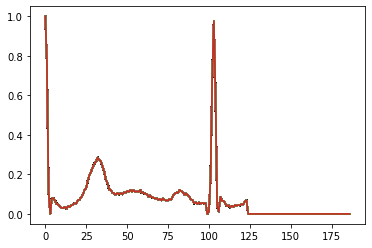

In [ ]:
#i = random.randint(0, len(xtest)-1)
for i in range(0, len(xtest)-1):
      output = model(np.expand_dims(xtest[i], i))

      pred = output.numpy()[i]

      plt.plot(xtest[i])

      print("Actual label: ", label_names[np.argmax(ytest[i])])
      print("Model prediction : ", label_names[np.argmax(pred)], " with probability ", pred[np.argmax(pred)])